In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import spearmanr

#path
data_path = r"C:\Users\57484\Desktop\毕业设计 bristol\Dataset\result_per_basin_KGE_NSE_CCC_lb90.csv"
save_dir = r"C:\Users\57484\Desktop\毕业设计 bristol\result_output"
os.makedirs(save_dir, exist_ok=True)


df = pd.read_csv(data_path)

# Set the style and color
sns.set(style="whitegrid", font_scale=1.1)
color_main = "#1f77b4"
trend_color = "#444444"
metrics = ['kge', 'nse', 'ccc']
metric_labels = {'kge': 'KGE', 'nse': 'NSE', 'ccc': 'CCC'}

#A function generates a graph and displays it + saves it
def plot_metric_subplot(set_type, x_var, x_label, filename):
    fig, axes = plt.subplots(ncols=3, figsize=(15, 4.5))
    fig.subplots_adjust(wspace=0.3)

    for idx, metric in enumerate(metrics):
        data = df[df['set'] == set_type]
        x = data[x_var]
        y = data[metric]
        
        # Calculate Spearman ρ and P value
        rho, pval = spearmanr(x, y)
        
        sns.scatterplot(
            x=x,
            y=y,
            ax=axes[idx],
            marker='o',
            s=60,
            color=color_main,
            edgecolor='black'
        )
        sns.regplot(
            x=x,
            y=y,
            scatter=False,
            ax=axes[idx],
            color=trend_color,
            line_kws={'linewidth': 1.5, 'linestyle': '--'},
            ci=95
        )
        
        axes[idx].set_xlabel(x_label, fontsize=13, fontweight='bold')
        axes[idx].set_ylabel(metric_labels[metric], fontsize=13, fontweight='bold')
        
       
        annotation = f"ρ = {rho:.2f}\nP Value= {pval:.3f}"
        axes[idx].text(
            0.97, 0.05, annotation, 
            transform=axes[idx].transAxes,
            fontsize=12,
            fontweight='bold',
            ha='right', va='bottom',
            color='#333333' 
        )
    fig.tight_layout()
    save_path = os.path.join(save_dir, filename)
    fig.savefig(save_path, dpi=300)
    plt.show()
    plt.close(fig)


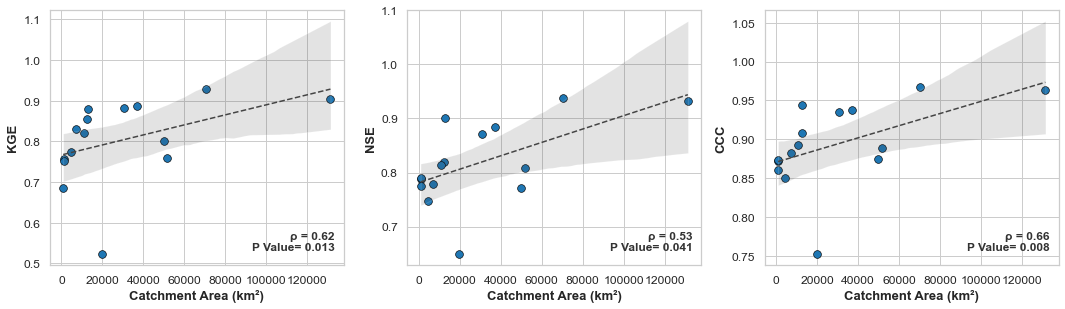

In [35]:
plot_metric_subplot(set_type="test", x_var="catch_area", x_label="Catchment Area (km²)", filename="TEST_area_vs_metrics.png")

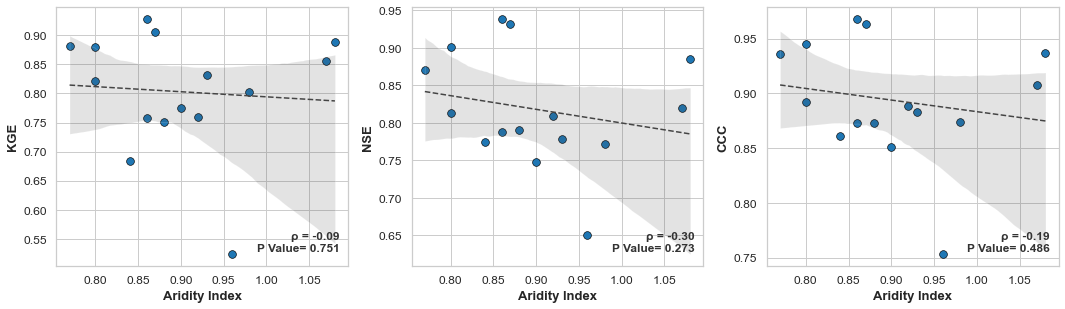

In [36]:
plot_metric_subplot(set_type="test", x_var="aridity_index", x_label="Aridity Index", filename="TEST_aridity_vs_metrics.png")

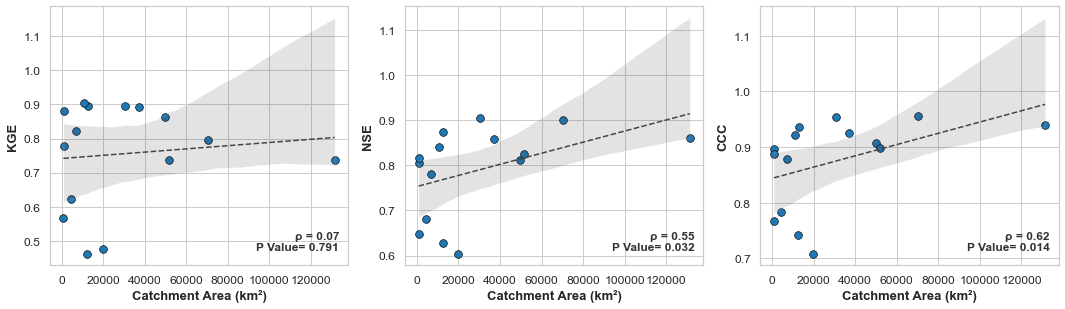

In [37]:
plot_metric_subplot(set_type="val", x_var="catch_area", x_label="Catchment Area (km²)", filename="VAL_area_vs_metrics.png")

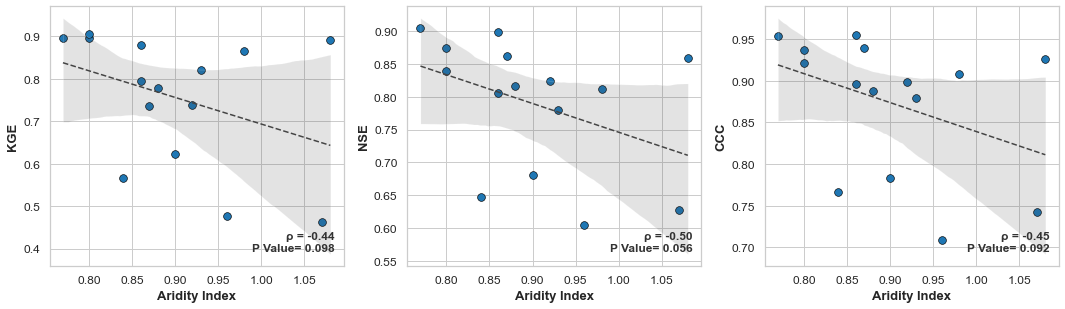

In [38]:
plot_metric_subplot(set_type="val", x_var="aridity_index", x_label="Aridity Index", filename="VAL_aridity_vs_metrics.png")